In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy as np
import mpl_toolkits.mplot3d.axes3d as axes3d

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


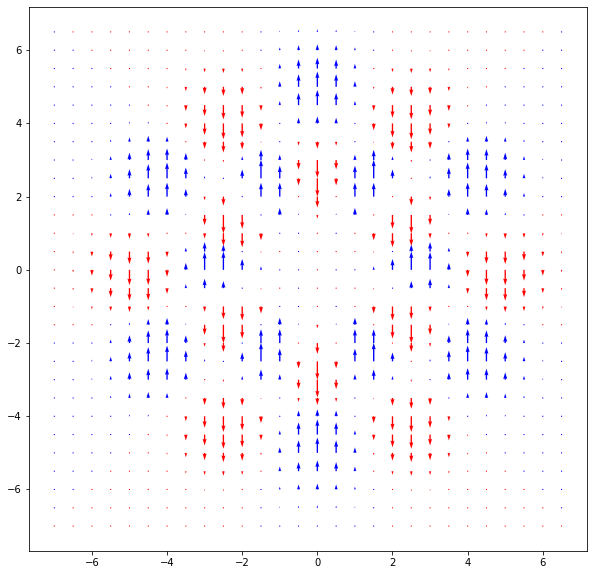

In [2]:
w = 2
plt.rcParams['figure.figsize'] = [10, 10]

X, Y = np.meshgrid(np.arange(-7, 7, 0.5), np.arange(-7, 7, 0.5))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        # Cartesian to polar 
        r = np.sqrt(X[x,y]**2 + Y[x,y]**2)
        theta = np.arctan2(Y[x,y],X[x,y])
        
        # Calculating E-field
        E = (-8 * ((r/w)**6) * (2*(r/w)**2 -7) * np.exp(6.0*1j*theta - (r/w)**2))
        
        U[x,y] = 0
        V[x,y] = E

        C[x,y] = -1 if E > 0 else 1

plt.quiver(X, Y, U, V, C, units='xy', cmap='bwr', scale=50)
plt.show()

/home/ian/.local/lib/python3.7/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


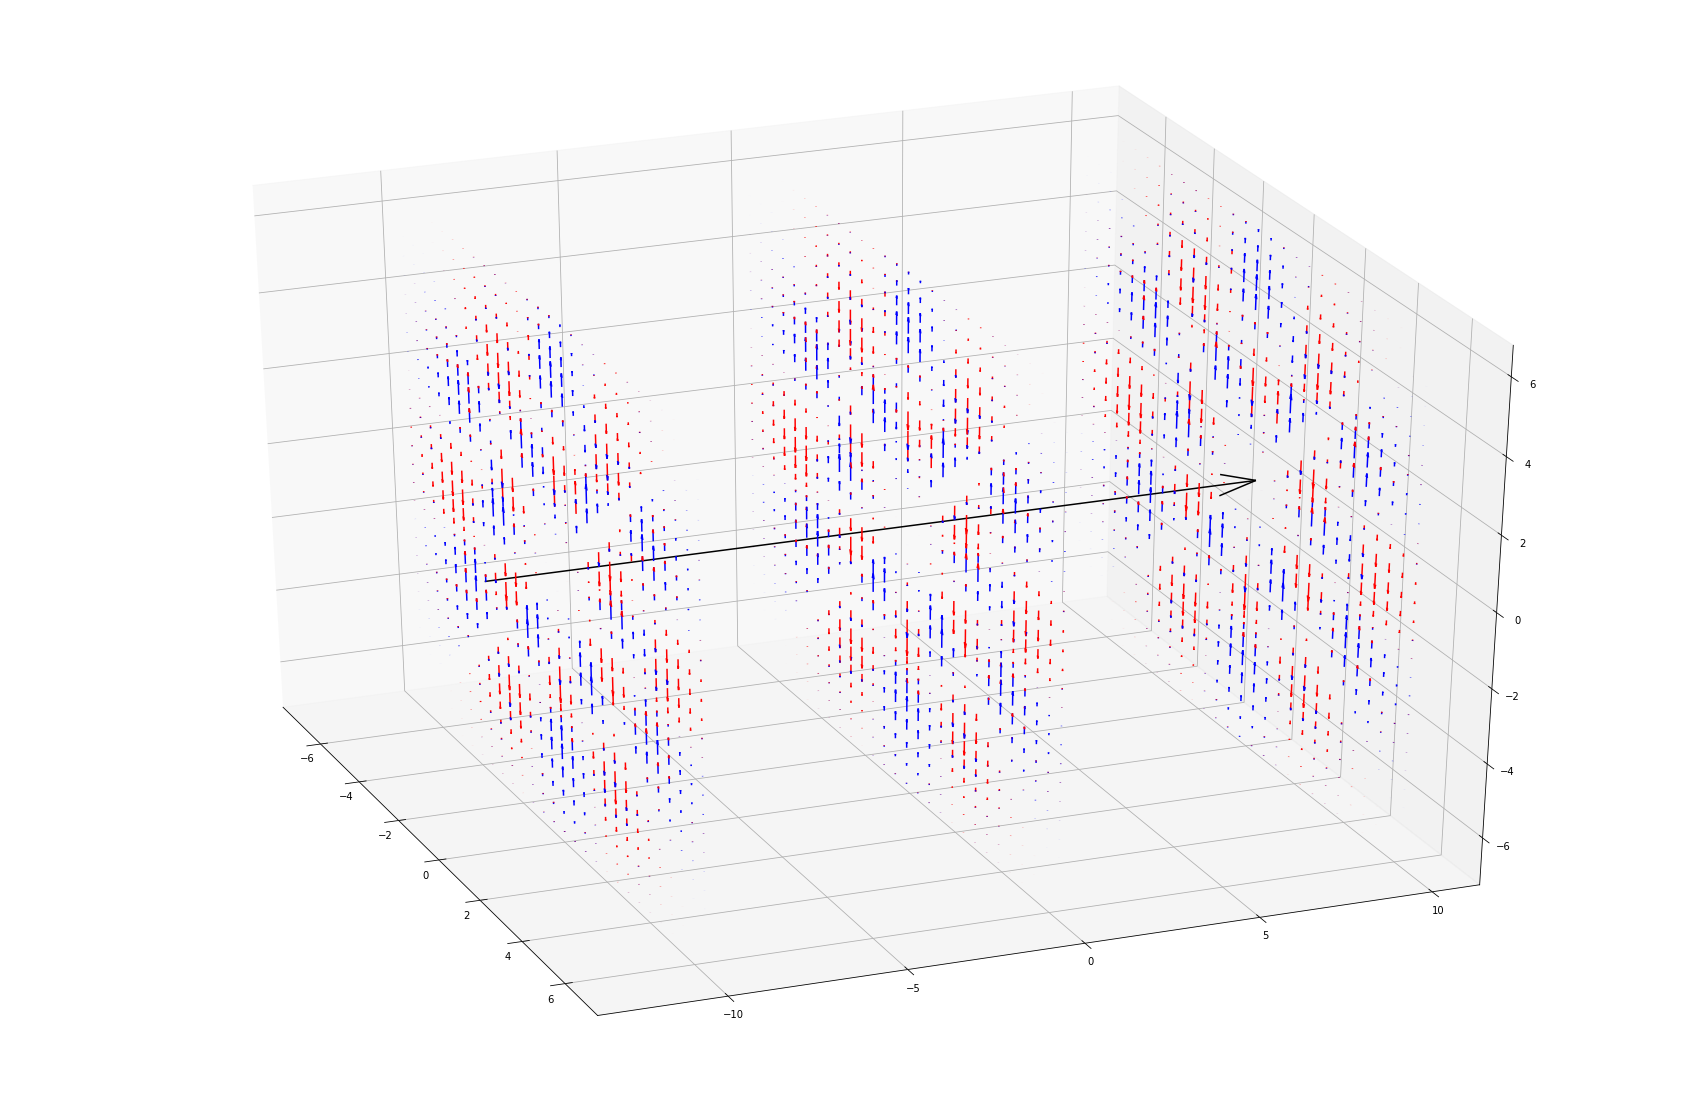

In [8]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [30, 20]
ax = fig.gca(projection='3d')

X, Y, Z = np.meshgrid(np.arange(-7, 7, 0.5), np.arange(-7, 7, 0.5), np.arange(-10, 10, 9.9))

shape = X.shape

U = np.zeros(shape)
V = np.zeros(shape)
W = np.zeros(shape)
C = np.zeros(shape)

for x in range(shape[0]):
    for y in range(shape[1]):
        for z in range(shape[2]):
            # Cartesian to polar 
            r = np.sqrt(X[x,y,z]**2 + Y[x,y,z]**2)
            theta = np.arctan2(Y[x,y,z],X[x,y,z])

            # Calculating E-field
            E = (-8 * ((r/w)**6) * (2*(r/w)**2 -7) * np.exp(6.0*1j*theta - (r/w)**2))
            U[x,y] = 0
            V[x,y] = E
            W[x,y] = 0

            C[x,y] = -1 if E > 0 else 1       

axis_X = 0
axis_Y = 0
axis_Z = -12
axis_U = 0
axis_V = 0
axis_W = 22
            
ax.view_init(30, -22)
q = ax.quiver(axis_X, axis_Z, axis_Y, axis_U, axis_W, axis_V, arrow_length_ratio=0.05, cmap='gist_gray')
q.set_array(np.asarray([0]))
q = ax.quiver(X, Z, Y, U, W, V, length=0.02, cmap='bwr')
q.set_array(C.flatten())